In [1]:
import pandas as pd

In [2]:
file_path_1 = '/content/PADIC-31-05SansFranSansAng.xlsx'

# Load the Excel file and get sheet names
dataset_1 = pd.ExcelFile(file_path_1)
print("Dataset 1 Sheets:", dataset_1.sheet_names)

# Parse and preview the first sheet (replace 0 with the desired sheet index)
df1 = dataset_1.parse(sheet_name=0)
print("Preview of Dataset 1 (First Sheet):")
print(df1.head())

# Display basic info
print("\nDataset 1 Info:")
df1.info()

Dataset 1 Sheets: ['Feuil1', 'Feuil2', 'Feuil3']
Preview of Dataset 1 (First Sheet):
                                                 MSA  \
0   تعالت أصوات الناس بالبكاء،  بدأت أتحدث بانفعا...   
1  فبكيت،  سكت الناس جميعا و أنا ذهلت من نفسي ، ك...   
2  قام الجميع يسلمون علي و يتحدثون معي ، نصفه بكا...   
3       دعينا للعشاء و كان العشاء يكفي جميع المدعوين   
4              ﺃمضيت ﺃياما جميلة لن أنساها طوال عمري   

                                                 ALG  \
0   عادو الناس يتباكاو بديت نهدر من قلبي تقول نهد...   
1   بكيت الناس كامل سكتو تخلعت في روحي تقول كنت ننوم   
2  ناضو ﭭﺎع سلمو عليا و يهدرو معايا نص بكا و نص ل...   
3         عرضونا للعشا و كان لعشا يكفي ليزاﻧڢيتي ﭭﺎع   
4              جوزت ايامات روعة ما ننساهاش طول حياتي   

                                                 ANB  \
0   عادوا الناس يتباكاو بديت نهدر بغش و ڨول عليا ...   
1   بكيت الناس كل سكتوا تشوكيت في روحي ڨول عليا نحلم   
2  ناضوا كل سلموا عليا و يهدروا معايا نصه بكا و ن...   
3         عرضونا 

In [3]:
# Add sentence length columns for each language
df1['MSA_Length'] = df1['MSA'].apply(lambda x: len(str(x).split()))
df1['ALG_Length'] = df1['ALG'].apply(lambda x: len(str(x).split()))
df1['ANB_Length'] = df1['ANB'].apply(lambda x: len(str(x).split()))
df1['TUN_Length'] = df1['TUN'].apply(lambda x: len(str(x).split()))
df1['PAL_Length'] = df1['PAL'].apply(lambda x: len(str(x).split()))
df1['SYR_Length'] = df1['SYR'].apply(lambda x: len(str(x).split()))
df1['MAR_Length'] = df1['MAR'].apply(lambda x: len(str(x).split()))

# Verify the new columns
print("Preview of Dataset with Length Columns:")
print(df1.head())

Preview of Dataset with Length Columns:
                                                 MSA  \
0   تعالت أصوات الناس بالبكاء،  بدأت أتحدث بانفعا...   
1  فبكيت،  سكت الناس جميعا و أنا ذهلت من نفسي ، ك...   
2  قام الجميع يسلمون علي و يتحدثون معي ، نصفه بكا...   
3       دعينا للعشاء و كان العشاء يكفي جميع المدعوين   
4              ﺃمضيت ﺃياما جميلة لن أنساها طوال عمري   

                                                 ALG  \
0   عادو الناس يتباكاو بديت نهدر من قلبي تقول نهد...   
1   بكيت الناس كامل سكتو تخلعت في روحي تقول كنت ننوم   
2  ناضو ﭭﺎع سلمو عليا و يهدرو معايا نص بكا و نص ل...   
3         عرضونا للعشا و كان لعشا يكفي ليزاﻧڢيتي ﭭﺎع   
4              جوزت ايامات روعة ما ننساهاش طول حياتي   

                                                 ANB  \
0   عادوا الناس يتباكاو بديت نهدر بغش و ڨول عليا ...   
1   بكيت الناس كل سكتوا تشوكيت في روحي ڨول عليا نحلم   
2  ناضوا كل سلموا عليا و يهدروا معايا نصه بكا و ن...   
3         عرضونا للعشا و كان العشا يكفي ليزاﻧڢيتي كل   
4     

In [4]:
# Prepare dataset for Dialect-to-MSA translation
dialect_to_msa_data = []

# Loop through each dialect column
for dialect in ['ALG', 'ANB', 'TUN', 'PAL', 'SYR', 'MAR']:
    subset = df1[[dialect, 'MSA']].rename(columns={dialect: 'Input', 'MSA': 'Target'})
    subset['Dialect'] = dialect  # Add a column for dialect name
    dialect_to_msa_data.append(subset)

# Combine all dialect data
dialect_to_msa_df = pd.concat(dialect_to_msa_data).reset_index(drop=True)

print("Preview of Dialect-to-MSA Data:")
print(dialect_to_msa_df.head())

Preview of Dialect-to-MSA Data:
                                               Input  \
0   عادو الناس يتباكاو بديت نهدر من قلبي تقول نهد...   
1   بكيت الناس كامل سكتو تخلعت في روحي تقول كنت ننوم   
2  ناضو ﭭﺎع سلمو عليا و يهدرو معايا نص بكا و نص ل...   
3         عرضونا للعشا و كان لعشا يكفي ليزاﻧڢيتي ﭭﺎع   
4              جوزت ايامات روعة ما ننساهاش طول حياتي   

                                              Target Dialect  
0   تعالت أصوات الناس بالبكاء،  بدأت أتحدث بانفعا...     ALG  
1  فبكيت،  سكت الناس جميعا و أنا ذهلت من نفسي ، ك...     ALG  
2  قام الجميع يسلمون علي و يتحدثون معي ، نصفه بكا...     ALG  
3       دعينا للعشاء و كان العشاء يكفي جميع المدعوين     ALG  
4              ﺃمضيت ﺃياما جميلة لن أنساها طوال عمري     ALG  


In [5]:
# Prepare data for dialect classification
classification_data = []

# Loop through each dialect column
for dialect in ['ALG', 'ANB', 'TUN', 'PAL', 'SYR', 'MAR']:
    subset = df1[[dialect]].rename(columns={dialect: 'Text'})
    subset['Dialect_Label'] = dialect  # Assign a label to each dialect
    classification_data.append(subset)

# Combine all dialect data
classification_df = pd.concat(classification_data).reset_index(drop=True)

print("Preview of Dialect Classification Data:")
print(classification_df.head())

Preview of Dialect Classification Data:
                                                Text Dialect_Label
0   عادو الناس يتباكاو بديت نهدر من قلبي تقول نهد...           ALG
1   بكيت الناس كامل سكتو تخلعت في روحي تقول كنت ننوم           ALG
2  ناضو ﭭﺎع سلمو عليا و يهدرو معايا نص بكا و نص ل...           ALG
3         عرضونا للعشا و كان لعشا يكفي ليزاﻧڢيتي ﭭﺎع           ALG
4              جوزت ايامات روعة ما ننساهاش طول حياتي           ALG


In [6]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Initialize tokenizer
tokenizer = Tokenizer()

# Fit tokenizer on all text data
all_text = dialect_to_msa_df['Input'].tolist() + dialect_to_msa_df['Target'].tolist()
tokenizer.fit_on_texts(all_text)

# Tokenize and pad sequences
input_sequences = tokenizer.texts_to_sequences(dialect_to_msa_df['Input'])
target_sequences = tokenizer.texts_to_sequences(dialect_to_msa_df['Target'])

input_padded = pad_sequences(input_sequences, padding='post')
target_padded = pad_sequences(target_sequences, padding='post')

# Verify tokenized and padded data
print("Example Input Padded Sequence:", input_padded[0])
print("Example Target Padded Sequence:", target_padded[0])

Example Input Padded Sequence: [14149   125 17520   913  1407     5  1636    78 15455 22768     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0]
Example Target Padded Sequence: [10074 10075   125 10076   499  1832 10077     1  3414 10078     2   125
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0]


In [7]:
from sklearn.model_selection import train_test_split

# Split data into training (80%) and temp set (20%)
X_temp, X_test, y_temp, y_test = train_test_split(
    input_padded, target_padded, test_size=0.2, random_state=42
)

# Further split the temp set into validation (50%) and test (50%)
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42
)

# Verify the split
print(f"Training samples: {len(X_train)}, Validation samples: {len(X_val)}, Test samples: {len(X_test)}")

Training samples: 15388, Validation samples: 15389, Test samples: 7695


In [8]:
# Prepare data for Dialect-to-MSA translation
X_train_baseline = X_train  # Training input (dialects)
y_train_baseline = y_train  # Training target (MSA)

# Validation data
X_val_baseline = X_val
y_val_baseline = y_val

# Test data
X_test_baseline = X_test
y_test_baseline = y_test

# Verify the prepared data
print(f"Baseline Training Input: {X_train_baseline.shape}, Baseline Training Target: {y_train_baseline.shape}")
print(f"Baseline Validation Input: {X_val_baseline.shape}, Baseline Validation Target: {y_val_baseline.shape}")
print(f"Baseline Test Input: {X_test_baseline.shape}, Baseline Test Target: {y_test_baseline.shape}")

Baseline Training Input: (15388, 55), Baseline Training Target: (15388, 52)
Baseline Validation Input: (15389, 55), Baseline Validation Target: (15389, 52)
Baseline Test Input: (7695, 55), Baseline Test Target: (7695, 52)


In [9]:
# Training data for MTL model
X_train_mtl = X_train
y_train_dialect_to_msa = y_train  # Dialect-to-MSA target
y_train_msa_to_dialect = y_train  # MSA-to-Dialect target (mirrored)
y_train_classifier = classification_df['Dialect_Label'].iloc[:len(X_train)].values  # Classifier labels as array

# Validation data for MTL model
X_val_mtl = X_val
y_val_dialect_to_msa = y_val
y_val_msa_to_dialect = y_val
y_val_classifier = classification_df['Dialect_Label'].iloc[len(X_train):len(X_train) + len(X_val)].values

# Test data for MTL model
X_test_mtl = X_test
y_test_dialect_to_msa = y_test
y_test_msa_to_dialect = y_test
y_test_classifier = classification_df['Dialect_Label'].iloc[len(X_train) + len(X_val):].values

# Verify splits for MTL
print(f"MTL Training Input: {X_train_mtl.shape}")
print(f"MTL Validation Input: {X_val_mtl.shape}")
print(f"MTL Test Input: {X_test_mtl.shape}")
print(f"MTL Training Target (Dialect-to-MSA): {y_train_dialect_to_msa.shape}")
print(f"MTL Validation Target (Dialect-to-MSA): {y_val_dialect_to_msa.shape}")
print(f"MTL Test Target (Dialect-to-MSA): {y_test_dialect_to_msa.shape}")
print(f"MTL Classifier Training Target Shape: {y_train_classifier.shape}")

MTL Training Input: (15388, 55)
MTL Validation Input: (15389, 55)
MTL Test Input: (7695, 55)
MTL Training Target (Dialect-to-MSA): (15388, 52)
MTL Validation Target (Dialect-to-MSA): (15389, 52)
MTL Test Target (Dialect-to-MSA): (7695, 52)
MTL Classifier Training Target Shape: (15388,)


In [10]:
import numpy as np

In [11]:
# Combined Inputs and Outputs for MTL Model

# Training Data
multitask_train_inputs = {
    "encoder_input": X_train_mtl,  # Shared encoder input
    "decoder_dialect_to_msa_input": np.concatenate(
        [np.zeros((y_train_dialect_to_msa.shape[0], 1)), y_train_dialect_to_msa[:, :-1]], axis=1
    ),
}

multitask_train_outputs = {
    "dialect_to_msa_output": y_train_dialect_to_msa,  # Dialect-to-MSA output
    "msa_to_dialect_output": y_train_msa_to_dialect,  # MSA-to-Dialect output
    "dialect_classifier_output": y_train_classifier,  # Classification output
}

# Validation Data
multitask_val_inputs = {
    "encoder_input": X_val_mtl,  # Shared encoder input
    "decoder_dialect_to_msa_input": np.concatenate(
        [np.zeros((y_val_dialect_to_msa.shape[0], 1)), y_val_dialect_to_msa[:, :-1]], axis=1
    ),
}

multitask_val_outputs = {
    "dialect_to_msa_output": y_val_dialect_to_msa,  # Dialect-to-MSA output
    "msa_to_dialect_output": y_val_msa_to_dialect,  # MSA-to-Dialect output
    "dialect_classifier_output": y_val_classifier,  # Classification output
}

# Test Data
multitask_test_inputs = {
    "encoder_input": X_test_mtl,  # Shared encoder input
    "decoder_dialect_to_msa_input": np.concatenate(
        [np.zeros((y_test_dialect_to_msa.shape[0], 1)), y_test_dialect_to_msa[:, :-1]], axis=1
    ),
}

multitask_test_outputs = {
    "dialect_to_msa_output": y_test_dialect_to_msa,  # Dialect-to-MSA output
    "msa_to_dialect_output": y_test_msa_to_dialect,  # MSA-to-Dialect output
    "dialect_classifier_output": y_test_classifier,  # Classification output
}


In [12]:
print(f"Training Input Shape: {multitask_train_inputs['encoder_input'].shape}")
print(f"Validation Input Shape: {multitask_val_inputs['encoder_input'].shape}")
print(f"Test Input Shape: {multitask_test_inputs['encoder_input'].shape}")
print(f"Training Output Shape (Dialect-to-MSA): {multitask_train_outputs['dialect_to_msa_output'].shape}")
print(f"Validation Output Shape (Dialect-to-MSA): {multitask_val_outputs['dialect_to_msa_output'].shape}")
print(f"Test Output Shape (Dialect-to-MSA): {multitask_test_outputs['dialect_to_msa_output'].shape}")


Training Input Shape: (15388, 55)
Validation Input Shape: (15389, 55)
Test Input Shape: (7695, 55)
Training Output Shape (Dialect-to-MSA): (15388, 52)
Validation Output Shape (Dialect-to-MSA): (15389, 52)
Test Output Shape (Dialect-to-MSA): (7695, 52)


In [13]:
print("Encoder Input Type:", multitask_train_inputs["encoder_input"].dtype)
print("Decoder Input Type:", multitask_train_inputs["decoder_dialect_to_msa_input"].dtype)

Encoder Input Type: int32
Decoder Input Type: float64


In [14]:
# Convert inputs and outputs to numpy arrays
multitask_train_inputs["encoder_input"] = np.array(multitask_train_inputs["encoder_input"], dtype=np.float32)
multitask_train_inputs["decoder_dialect_to_msa_input"] = np.array(multitask_train_inputs["decoder_dialect_to_msa_input"], dtype=np.float32)

multitask_train_outputs["dialect_to_msa_output"] = np.array(multitask_train_outputs["dialect_to_msa_output"], dtype=np.int32)
multitask_train_outputs["msa_to_dialect_output"] = np.array(multitask_train_outputs["msa_to_dialect_output"], dtype=np.int32)

In [15]:
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Combine all unique labels across training, validation, and test sets
all_labels = np.unique(
    np.concatenate([y_train_classifier, y_val_classifier, y_test_classifier])
)

# Fit LabelEncoder on all unique labels
label_encoder = LabelEncoder()
label_encoder.fit(all_labels)

# Transform labels for all sets
y_train_classifier_encoded = label_encoder.transform(y_train_classifier)
y_val_classifier_encoded = label_encoder.transform(y_val_classifier)
y_test_classifier_encoded = label_encoder.transform(y_test_classifier)

# Update multitask outputs with encoded classifier labels
multitask_train_outputs["dialect_classifier_output"] = y_train_classifier_encoded
multitask_val_outputs["dialect_classifier_output"] = y_val_classifier_encoded
multitask_test_outputs["dialect_classifier_output"] = y_test_classifier_encoded

# Verify the encoding process
print("Unique Labels in Training:", np.unique(y_train_classifier_encoded))
print("Unique Labels in Validation:", np.unique(y_val_classifier_encoded))
print("Unique Labels in Test:", np.unique(y_test_classifier_encoded))

Unique Labels in Training: [0 1 5]
Unique Labels in Validation: [3 4 5]
Unique Labels in Test: [2 4]


In [16]:
# Ensure encoder input is tokenized and padded
multitask_train_inputs["encoder_input"] = np.array(multitask_train_inputs["encoder_input"], dtype="int32")

# Ensure decoder input is tokenized and padded
multitask_train_inputs["decoder_dialect_to_msa_input"] = np.array(multitask_train_inputs["decoder_dialect_to_msa_input"], dtype="int32")

In [17]:
# Ensure all labels are strings
y_train_classifier = y_train_classifier.astype(str)
y_val_classifier = y_val_classifier.astype(str)
y_test_classifier = y_test_classifier.astype(str)

# Combine all unique labels across datasets
all_labels = np.unique(np.concatenate([y_train_classifier, y_val_classifier, y_test_classifier]))

# Fit LabelEncoder on all unique labels
label_encoder = LabelEncoder()
label_encoder.fit(all_labels)

# Transform labels for training, validation, and test sets
y_train_classifier = label_encoder.transform(y_train_classifier)
y_val_classifier = label_encoder.transform(y_val_classifier)
y_test_classifier = label_encoder.transform(y_test_classifier)

# Update multitask outputs
multitask_train_outputs["dialect_classifier_output"] = y_train_classifier
multitask_val_outputs["dialect_classifier_output"] = y_val_classifier
multitask_test_outputs["dialect_classifier_output"] = y_test_classifier


In [18]:
# Check the unique labels after encoding
print("Unique Encoded Labels (Training):", np.unique(y_train_classifier))
print("Unique Encoded Labels (Validation):", np.unique(y_val_classifier))
print("Unique Encoded Labels (Test):", np.unique(y_test_classifier))

# Check the mapping of labels
print("Label Mapping:", dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))

Unique Encoded Labels (Training): [0 1 5]
Unique Encoded Labels (Validation): [3 4 5]
Unique Encoded Labels (Test): [2 4]
Label Mapping: {'ALG': 0, 'ANB': 1, 'MAR': 2, 'PAL': 3, 'SYR': 4, 'TUN': 5}


In [19]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
from tensorflow.keras.models import load_model

# Load the baseline model from Drive
baseline_model = load_model('/content/drive/My Drive/baseline_model.h5')
print("Baseline model loaded from Google Drive!")

# Load the MTL model from Drive
mtl_model = load_model('/content/drive/My Drive/mtl_model.h5')
print("MTL model loaded from Google Drive!")

Baseline model loaded from Google Drive!


MTL model loaded from Google Drive!


In [21]:
import tensorflow as tf
from nltk.translate.bleu_score import sentence_bleu
from tqdm import tqdm
import gc

# Enable mixed precision to reduce memory usage
tf.keras.mixed_precision.set_global_policy('mixed_float16')

# Initialize BLEU scores list
baseline_test_bleu_scores = []

# Define chunk size and batch size
chunk_size = 250  # Reduce chunk size to minimize GPU memory usage
batch_size = 8    # Smaller batch size for lower memory footprint

# Process test data in smaller chunks
for i in tqdm(range(0, len(multitask_test_inputs["encoder_input"]), chunk_size)):
    # Extract current chunk
    encoder_input_chunk = multitask_test_inputs["encoder_input"][i:i+chunk_size]
    decoder_input_chunk = multitask_test_inputs["decoder_dialect_to_msa_input"][i:i+chunk_size]

    # Predict using GPU
    with tf.device('/GPU:0'):
        baseline_test_predictions = baseline_model.predict(
            [encoder_input_chunk, decoder_input_chunk],
            batch_size=batch_size,
            verbose=0
        )

    # Convert predictions and ground truth to text
    predicted_sequences_chunk = tokenizer.sequences_to_texts(np.argmax(baseline_test_predictions, axis=-1))
    true_sequences_chunk = tokenizer.sequences_to_texts(multitask_test_outputs["dialect_to_msa_output"][i:i+chunk_size])

    # Calculate BLEU scores for the current chunk
    for true_seq, pred_seq in zip(true_sequences_chunk, predicted_sequences_chunk):
        bleu = sentence_bleu([true_seq.split()], pred_seq.split(), weights=(0.5, 0.5))  # Adjust weights if necessary
        baseline_test_bleu_scores.append(bleu)

    # Free memory after processing each chunk
    del encoder_input_chunk, decoder_input_chunk, baseline_test_predictions
    gc.collect()

# Calculate the final BLEU score
baseline_test_bleu = np.mean(baseline_test_bleu_scores)
print(f"Baseline Test BLEU Score: {baseline_test_bleu:.4f}")


  0%|          | 0/31 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/nltk/translate/bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
100%|██████████| 31/31 [02:05<00:00,  4.03s/it]

Baseline Test BLEU Score: 0.0394



Final Baseline Test BLEU Score: 0.0394


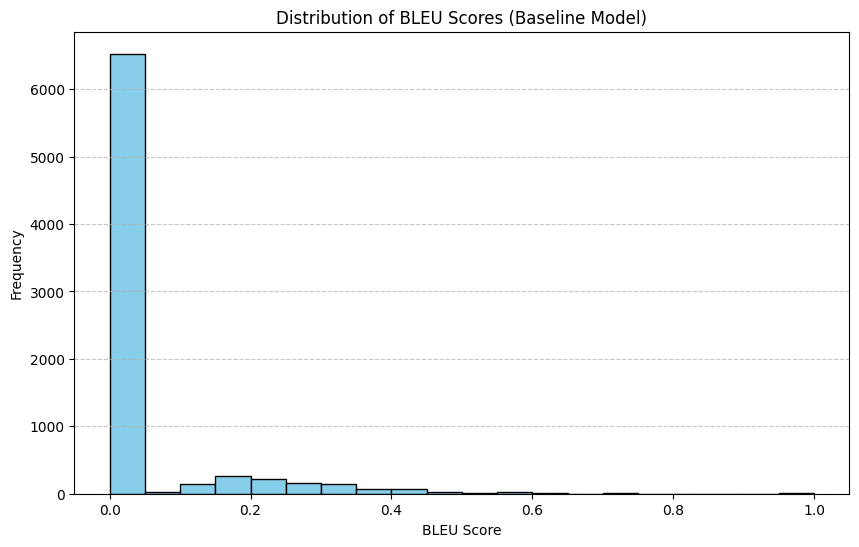

In [23]:
# Display the results of the Baseline Test BLEU Score
print(f"\nFinal Baseline Test BLEU Score: {baseline_test_bleu:.4f}")

# Optional: Visualize the BLEU score distribution across chunks
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(baseline_test_bleu_scores, bins=20, color='skyblue', edgecolor='black')
plt.title("Distribution of BLEU Scores (Baseline Model)")
plt.xlabel("BLEU Score")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Processing MTL Test Data: 100%|██████████| 31/31 [03:51<00:00,  7.48s/it]


MTL Test BLEU Score: 0.3492


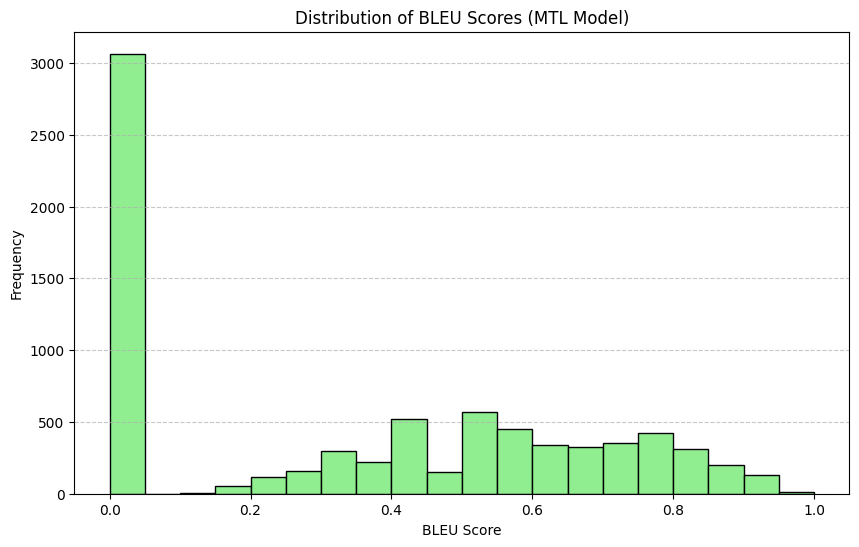

Baseline Test BLEU Score: 0.0394
MTL Test BLEU Score: 0.3492


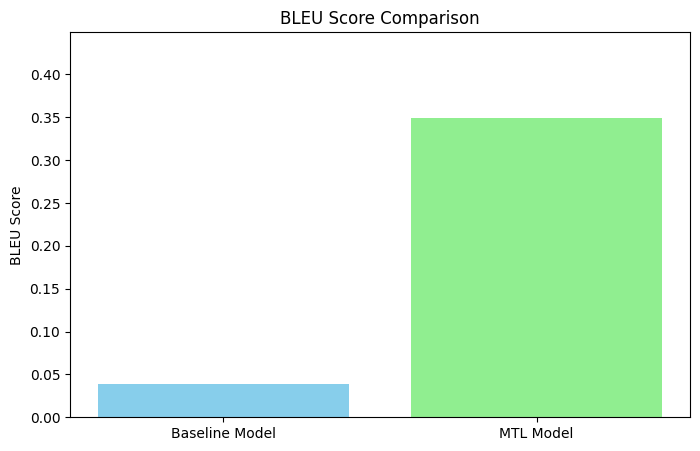

In [24]:
from tqdm import tqdm
from nltk.translate.bleu_score import sentence_bleu

# Initialize BLEU scores list
mtl_test_bleu_scores = []

# Process test data in smaller chunks
chunk_size = 250  # Keep chunk size small to avoid memory overflow
batch_size = 8    # Small batch size for reduced GPU memory usage

for i in tqdm(range(0, len(multitask_test_inputs["encoder_input"]), chunk_size), desc="Processing MTL Test Data"):
    # Extract current chunk
    encoder_input_chunk = multitask_test_inputs["encoder_input"][i:i+chunk_size]
    decoder_input_chunk = multitask_test_inputs["decoder_dialect_to_msa_input"][i:i+chunk_size]

    # Predict using GPU
    with tf.device('/GPU:0'):
        mtl_test_predictions = mtl_model.predict(
            [encoder_input_chunk, decoder_input_chunk],
            batch_size=batch_size,
            verbose=0
        )

    # Convert predictions and ground truth to text
    predicted_sequences_chunk = tokenizer.sequences_to_texts(np.argmax(mtl_test_predictions[0], axis=-1))  # Task 1: Dialect-to-MSA
    true_sequences_chunk = tokenizer.sequences_to_texts(multitask_test_outputs["dialect_to_msa_output"][i:i+chunk_size])

    # Calculate BLEU scores for the current chunk
    for true_seq, pred_seq in zip(true_sequences_chunk, predicted_sequences_chunk):
        bleu = sentence_bleu([true_seq.split()], pred_seq.split(), weights=(0.5, 0.5))  # Adjust weights if necessary
        mtl_test_bleu_scores.append(bleu)

    # Free memory after processing each chunk
    del encoder_input_chunk, decoder_input_chunk, mtl_test_predictions
    gc.collect()

# Calculate the final BLEU score
mtl_test_bleu = np.mean(mtl_test_bleu_scores)
print(f"MTL Test BLEU Score: {mtl_test_bleu:.4f}")

# Visualization of BLEU Score Distribution
plt.figure(figsize=(10, 6))
plt.hist(mtl_test_bleu_scores, bins=20, color='lightgreen', edgecolor='black')
plt.title("Distribution of BLEU Scores (MTL Model)")
plt.xlabel("BLEU Score")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Comparison of BLEU Scores
print(f"Baseline Test BLEU Score: {baseline_test_bleu:.4f}")
print(f"MTL Test BLEU Score: {mtl_test_bleu:.4f}")

# Visualization: Compare Baseline vs. MTL BLEU Scores
plt.figure(figsize=(8, 5))
plt.bar(["Baseline Model", "MTL Model"], [baseline_test_bleu, mtl_test_bleu], color=['skyblue', 'lightgreen'])
plt.title("BLEU Score Comparison")
plt.ylabel("BLEU Score")
plt.ylim(0, max(baseline_test_bleu, mtl_test_bleu) + 0.1)
plt.show()
